# WEEK 8 Capstone Project
# **FITBIT CONSUMER BEHAVIOUR ANALYSIS**

![img](https://130e178e8f8ba617604b-8aedd782b7d22cfe0d1146da69a52436.ssl.cf1.rackcdn.com/fitbit-hack-what-are-lessons-showcase_image-6-a-8793.jpg)

## INTRODUCTION
Fitbit Inc. is an American consumer electronics and fitness company. It produces wireless-enabled wearable technology, physical fitness monitors and activity trackers such as smartwatches, pedometers and monitors for heart rate, quality of sleep and stairs climbed as well as related software. The company was acquired by Google in January 2021.
The company was founded as Healthy Metrics Research, Inc. in San Francisco, California, on March 26, 2007, by *James Park* (CEO) and *Eric Friedman* (CTO).

# OBJECTIVE
Imagine you are a data analyst at **“HealthTrackers Inc.**,” a fictional company operating in the Fitbit industry. Your company is dedicated to understanding consumer behavior to enhance product offerings and optimize marketing strategies. You have been tasked with analyzing a comprehensive dataset obtained from Fitbit users to uncover trends and insights. The business objective is to identify key trends, understand their implications for customers, and leverage these insights to shape an effective marketing strategy.

# BUSINESS TASK
Analyze FitBit Fitness Tracker App data to gain insights into how consumers are using the FitBit app and discover trends and insights for the marketing team.

# BUSINESS OBJECTIVE
- What are the trends identified?
- How could these trends apply to customers?
- How could these trends help influence marketing strategy?

## 1. Data Source:
1. The data is given to us by our mentor available through Google Drive. It contains personal fitness tracker data from over 30 FitBit users who have given consent to use their data.
2. There are 18 csv files total, but the datasets used according to the product analysis are `daily activity`, `hourly calories`, `hourly steps`, `sleep day`, `daily_calories`, `daily_intensity`, `weight_log` and `daily_steps`dataset.

## 2. Sorting the data
1. To have a quick overview of the chosen data, I opened each of them in MS Excel. The first thing I noticed was that the data was organized in a long format. I also noticed that the `dailyActivity_merged` data contains some metrics that can give us some insights like the total steps taken by the Fitbit users, the active minutes spent, and the calories burned. With that we can establish some correlation between calories burned and the steps taken. The hourly calories and the hourly steps contain info about the activity hour that will help give some insight about calories and the time of the day.

2. Then I created a separate folder on my desktop to store the files, since I was going to use Jupyter Notebook to process the data.

## 3. Loading Libraries
Let's start by loading libraries for data processing and visualization.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

## 4. Loading datasets
We will be loading the relevant datasets necessary for the analysis.

Mounting Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
daily_activity = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/dailyActivity_merged.csv')
hourly_steps = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/hourlySteps_merged.csv')
hourly_calories = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/hourlyCalories_merged.csv')
sleepday = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/sleepDay_merged.csv')
daily_calories = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/dailyCalories_merged.csv')
daily_intensity = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/dailyIntensities_merged.csv')
weight_log = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/weightLogInfo_merged.csv')
daily_steps = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/dailySteps_merged.csv')
heartrate_secs = pd.read_csv('/content/drive/MyDrive/PrepInsta_Wokerd/week 8/heartrate_seconds_merged.csv')

## 5. Data Exploration
Let's explore our data by viewing some information about them.

### Showing the first 5 rows of each dataset.

In [6]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [8]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [9]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [10]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [11]:
daily_intensity.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [12]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [13]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [14]:
heartrate_secs.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


### Let's see how many unique users are present in each dataset.

In [15]:
print("Daily Activity Dataset:",daily_activity.Id.nunique(), "unique users")
print("Hourly Steps Dataset:",hourly_steps.Id.nunique(), "unique users")
print("Hourly Calories Dataset:",hourly_calories.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepday.Id.nunique(), "unique users")
print("Daily Calories Dataset:",daily_calories.Id.nunique(), "unique users")
print("Daily Intensity Dataset:",daily_intensity.Id.nunique(), "unique users")
print("Weight Logged Dataset:",weight_log.Id.nunique(), "unique users")
print("Daily Steps Dataset:",daily_steps.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heartrate_secs.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
Hourly Steps Dataset: 33 unique users
Hourly Calories Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Daily Calories Dataset: 33 unique users
Daily Intensity Dataset: 33 unique users
Weight Logged Dataset: 8 unique users
Daily Steps Dataset: 33 unique users
Heart Rate Dataset: 14 unique users


### Let's view the data types in each dataset.

In [16]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [17]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [18]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [19]:
sleepday.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [20]:
daily_calories.dtypes

Id              int64
ActivityDay    object
Calories        int64
dtype: object

In [21]:
daily_intensity.dtypes

Id                            int64
ActivityDay                  object
SedentaryMinutes              int64
LightlyActiveMinutes          int64
FairlyActiveMinutes           int64
VeryActiveMinutes             int64
SedentaryActiveDistance     float64
LightActiveDistance         float64
ModeratelyActiveDistance    float64
VeryActiveDistance          float64
dtype: object

In [22]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [23]:
daily_steps.dtypes

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

In [24]:
heartrate_secs.dtypes

Id        int64
Time     object
Value     int64
dtype: object

### Let's view their shape.

In [25]:
print("Shape of Daily Activity:",daily_activity.shape)
print("Shape of Hourly Steps:",hourly_steps.shape)
print("Shape of Hourly Calories:",hourly_calories.shape)
print("Shape of SleepDay:",sleepday.shape)
print("Shape of Daily Calories:",daily_calories.shape)
print("Shape of Daily Intensity:",daily_intensity.shape)
print("Shape of Weight Logged:",weight_log.shape)
print("Shape of Daily Steps:",daily_steps.shape)
print("Shape of Heart Rate:",heartrate_secs.shape)

Shape of Daily Activity: (940, 15)
Shape of Hourly Steps: (22099, 3)
Shape of Hourly Calories: (22099, 3)
Shape of SleepDay: (413, 5)
Shape of Daily Calories: (940, 3)
Shape of Daily Intensity: (940, 10)
Shape of Weight Logged: (67, 8)
Shape of Daily Steps: (940, 3)
Shape of Heart Rate: (2483658, 3)


### Checking if the datasets have missing values.

In [26]:
print("Daily Activity Dataset has",daily_activity.isnull().values.sum(), "missing values")
print("Hourly Steps Dataset has",hourly_steps.isnull().values.sum(), "missing values")
print("Hourly Calories Dataset has",hourly_calories.isnull().values.sum(), "missing values")
print("SleepDay Dataset has",sleepday.isnull().values.sum(), "missing values")
print("Daily Calories Dataset has",daily_calories.isnull().values.sum(), "missing values")
print("Daily Intensity Dataset has",daily_intensity.isnull().values.sum(), "missing values")
print("Daily Steps Dataset has",daily_steps.isnull().values.sum(), "missing values")
print("Heart Rate Dataset has",heartrate_secs.isnull().values.sum(), "missing values")

Daily Activity Dataset has 0 missing values
Hourly Steps Dataset has 0 missing values
Hourly Calories Dataset has 0 missing values
SleepDay Dataset has 0 missing values
Daily Calories Dataset has 0 missing values
Daily Intensity Dataset has 0 missing values
Daily Steps Dataset has 0 missing values
Heart Rate Dataset has 0 missing values


**As we can see that all the dataset has 0 missing/null values. The data preprocessing will be easier in this case.**

### Checking the dataset for duplicates.

In [27]:
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head(3))
print("Duplicates in Hourly Steps: ", hourly_steps.duplicated().head(3))
print("Duplicates in Hourly Calories: ", hourly_calories.duplicated().head(3))
print("Duplicates in Sleepday: ", sleepday.duplicated().head(3))
print("Duplicates in Daily Calories: ", daily_calories.duplicated().head(3))
print("Duplicates in Daily Intensity: ", daily_intensity.duplicated().head(3))
print("Duplicates in Daily Steps: ", daily_steps.duplicated().head(3))
print("Duplicates in Heart Rate: ", heartrate_secs.duplicated().head(3))

Duplicates in Daily Acitivity:  0    False
1    False
2    False
dtype: bool
Duplicates in Hourly Steps:  0    False
1    False
2    False
dtype: bool
Duplicates in Hourly Calories:  0    False
1    False
2    False
dtype: bool
Duplicates in Sleepday:  0    False
1    False
2    False
dtype: bool
Duplicates in Daily Calories:  0    False
1    False
2    False
dtype: bool
Duplicates in Daily Intensity:  0    False
1    False
2    False
dtype: bool
Duplicates in Daily Steps:  0    False
1    False
2    False
dtype: bool
Duplicates in Heart Rate:  0    False
1    False
2    False
dtype: bool


We can see that there are no duplicate values present in the datsets.

#### Summary of Initial Findings

- Of all the datasets we inspected, `heartrate_secs`, `weight_logged` and `sleepday` fell short of our **n>=30** rule (NOTE: here n refers to sample size). `heartrate_secs` has **n=14**, and `weight_logged` only has **n=8**, hence we’re going to drop both of them. `sleepday` has **n=24**, which is also quite small. However, we are going to keep it, since we might gain some relevant insights from it.
- `daily_calories`, `daily_intensity`, and `daily_steps` all have exactly the same data that is found in the `daily_activity` dataset. **StepTotal** in `daily_intensity` was only changed to **TotalSteps** in `daily_activity` datasets. Other than that, they are the same data. Hence, we’ll discard them. Leaving us with `daily_activity`, `hourly_steps`, `hourly_calories`, and `sleepday` datasets.
- From the shape, I observed that `hourly_steps` and `hourly_calories` have similar structures: (22099, 3). Hence, we can decide to merge them for further analysis.
- As for the data types, **ActivityDate** in `daily_activity`, **ActivityHour** in `hourly_steps`, **ActivityHour** in `hourly_calories`, and **SleepDay** in `sleepday` are *objects* instead of *datetime* data type. We’ll have to convert them to *datetime* data type for easy processing.
- There are **NO** missing values and duplicates in all datasets.

## 6. DATA TRANSFORMATION
Let's start by converting the **ActivityDate** in `daily_activity`, **ActivityHour** in `hourly_steps`, **ActivityHour** in `hourly_calories`, and **SleepDay** in `sleepday` to *datetime* data type.

In [28]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

### Checking for Changes.

In [29]:
print("Daily Activity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Hourly Steps data type is", hourly_steps["ActivityHour"].dtypes, "data type")
print("Hourly Calories data type is", hourly_calories["ActivityHour"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")

Daily Activity data type is datetime64[ns] data type
Hourly Steps data type is datetime64[ns] data type
Hourly Calories data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type


### Merging `hourly_steps` with `hourly_calories` dataset below.

In [30]:
for col in hourly_steps.columns, hourly_calories.columns:
    print (col)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


**We can see above that they both share `Id` and `ActivityHour` in common. Hence, we'll merge them on `Id` and `ActivityHour` below.**

In [31]:
merge_df = pd.merge(hourly_steps, hourly_calories,
                    on=['Id', 'ActivityHour'], how='inner')

merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


### Creating new columns.

Let's create a new column (WeekDay) from the `ActivityHour` in our new dataset `merged_df`, and `ActivityDate` in `daily_activity`. This will help us see if the days of the week has any bearing on our analysis.

In [32]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
merge_df["WeekDay"] = merge_df["ActivityHour"].dt.day_name()
sleepday["WeekDay"] = sleepday["SleepDay"].dt.day_name()

In [33]:
# viewing changes
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


**We still need to make some changes to the `merge_df` dataframe. We need to extract the `ActivityHour` column by creating a separate column.**

In [34]:
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour

In [35]:
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,DateHour
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4


**We have created a separate column `DateHour`, let's remove the Hour, min, and sec.**

In [36]:
merge_df["ActivityDay"] = merge_df["ActivityHour"].dt.date

### Drop ActivityHour column

In [37]:
merge_df = merge_df.drop("ActivityHour", axis = 1)
merge_df.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


### Changing ActivityDay column to DateTime data type.

In [38]:
merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

**We're going to merge `sleepday` with `merge_df` to create a new dataframe that contains sleepday record with calories for some analysis. Hence, before we do, let's change the column name `SleepDay` in sleepday df, so it matches `ActivityDay` in merge_df.**

In [39]:
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


**Merging `sleepday` with `merge_df`. But first, let's see what the columns they share in common.**

In [40]:
for col in merge_df.columns, sleepday.columns:
    print (col)

Index(['Id', 'StepTotal', 'Calories', 'WeekDay', 'DateHour', 'ActivityDay'], dtype='object')
Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


**Since they have `Id`, `ActivityDay` and `WeekDay` in common, we'll merge both dataframes on `Id`, `ActivityDay` and `WeekDay`.**

In [41]:
merge_df2 = pd.merge(merge_df, sleepday,
                    on=['Id', 'ActivityDay', 'WeekDay'], how='inner')

merge_df2.head(5)

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


In [42]:
# Let's see how many unique users and missing values we have in our new dataframe
print("Merge_df2 Dataframe has",merge_df2.Id.nunique(), "unique users")
print("Merge_df2 DataFrame has",merge_df2.isnull().values.sum(), "missing values")

Merge_df2 Dataframe has 24 unique users
Merge_df2 DataFrame has 0 missing values


**Making some changes to the `daily_activity` dataframe. We'll start by creating 2 additional columns (`TotalActiveMinutes`, `TotalMinutes`, and `TotalActiveHours`). Then we'll remove some columns we won't need.**

In [43]:
new_cols = ["Id", "ActivityDate",
            "WeekDay", "TotalSteps",
            "TotalDistance", "VeryActiveDistance",
            "ModeratelyActiveDistance", "LightActiveDistance",
            "SedentaryActiveDistance", "VeryActiveMinutes",
            "FairlyActiveMinutes", "LightlyActiveMinutes",
            "SedentaryMinutes", "TotalActiveMinutes",
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)

In [44]:
daily_activity[["TotalActiveMinutes",
                "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


**The `TotalActiveMinutes` and `TotalMinutes` columns have been created, but they currently don't have any values since they have not been created.**

**For the **`TotalActiveMinutes`**, I will create the values by summing up all the active minutes i.e `VeryActiveMinutes`, `FairlyActiveMinutes`, and `LightActiveMinutes` and for the **`TotalMinutes`**, I will sum up the `TotalActiveMinutes` and the `SedentaryMinutes`.**

In [45]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

In [46]:
daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


## 7. Analyzing the data
**Our data is processing is complete, and now it's time to analyze it for insights. We have narrowed down our datasets to 3 dataframes**:
- `daily_activity`
- `merge_df`
- `merge_df2`

**We're going to draw the insights from these dataframes.
Let's get statistical info from them.**

In [47]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


In [48]:
merge_df.describe()

,Id,StepTotal,Calories,DateHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [49]:
merge_df2.describe()

,Id,StepTotal,Calories,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


### Key  findings:
- Out of 1218 Total minutes, 991 minutes were spent inactive (Sedentary). Approximately 228 active minutes were spent.
- An average of 7638 total steps were taken by the users daily.
- There is also an average of 2304 calories burnt daily.
- Also, there is a positive correlation between steps taken and calories burnt.

## 8. Visualizing the data

#### Creating a Correlation heatmap to show the positive and negative correlation among the columns.

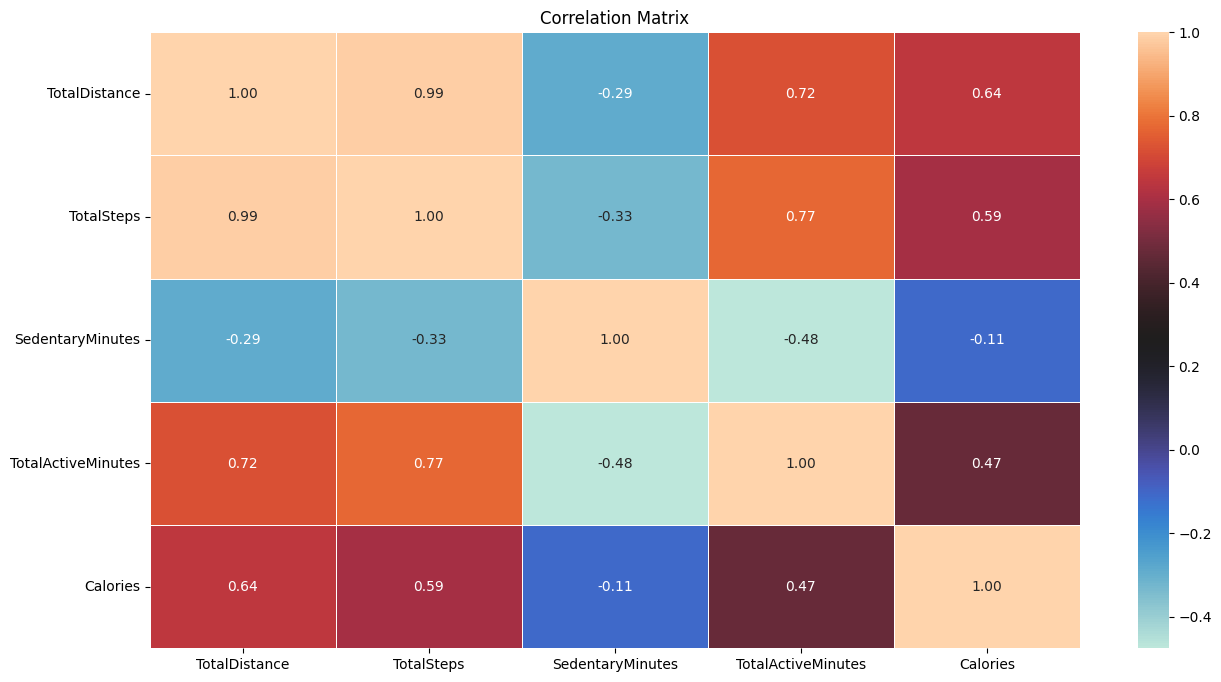

In [50]:
Corr1 = ["TotalDistance", "TotalSteps",
         "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(daily_activity[Corr1].corr(),
            annot = True,
            fmt = ".2f",
            linewidths=0.5,
           cmap="icefire")

ax.set_title('Correlation Matrix');

### KEY FINDINGS:
- There is a positive correlation between `Calories` and `TotalActiveMinutes`, `TotalSteps`, and `TotalDistance`.
- There is a negative correlation between `Calories` and `SedentaryMinutes`.

### Comparing Total Steps and Sedantary Minutes to Calories.

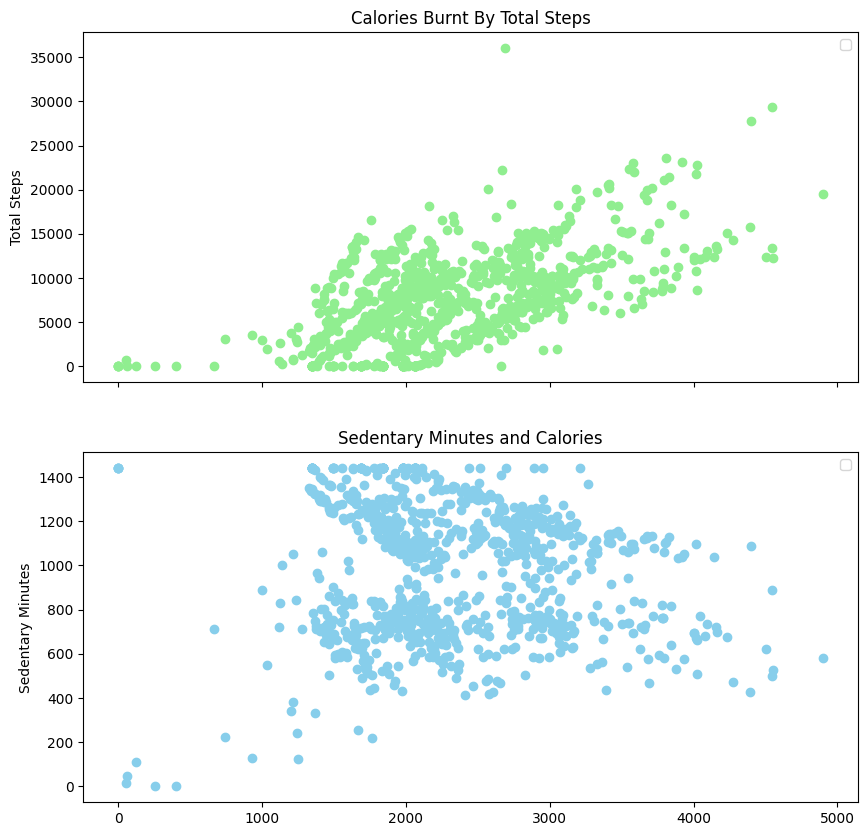

In [51]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=daily_activity["Calories"],
                     y=daily_activity["TotalSteps"],
                     color="lightgreen")
ax0.set(title="Calories Burnt By Total Steps",
       ylabel="Total Steps")

ax0.legend(*scatter.legend_elements(), title=None)

scatter = ax1.scatter(x=daily_activity["Calories"],
                     y=daily_activity["SedentaryMinutes"],
                     color="skyblue")
ax1.set(title="Sedentary Minutes and Calories",
       ylabel="Sedentary Minutes")

ax1.legend(*scatter.legend_elements(), title=None);

### KEY FINDINGS:
- This scatterplot gives us a clearer view of the correlation between `TotalSteps` and `SedentaryMinutes` to `Calories`.
- The more the steps taken, the more the calories burnt.
- On the other hand, the more the Sedentary minutes, the less the calories burnt.

### Showing amount of calories burnt for every steps taken in a scatter plot shown below.

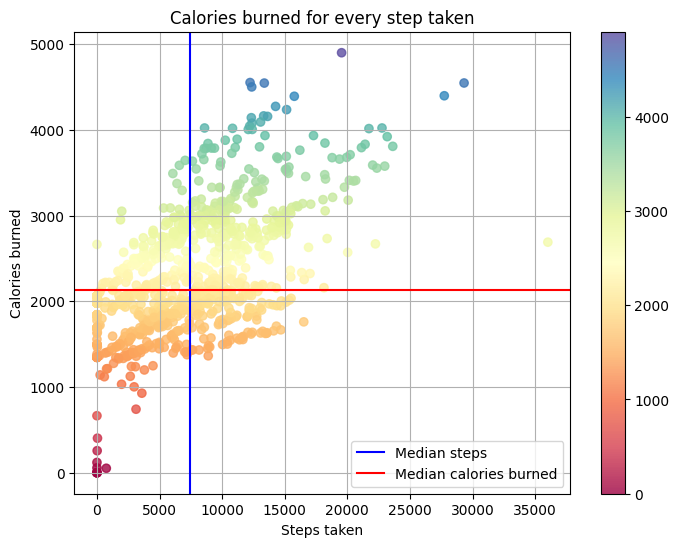

In [52]:
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(daily_activity["TotalSteps"],daily_activity["Calories"],
            alpha = 0.8, c = daily_activity["Calories"],
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2134
median_steps = 7405

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

### KEY FINDINGS:
From the scatter plot, we infer that:
1. It is a positive correlation.
2. Observed that intensity of calories burned increase when users are at the range of >0 to 15,000 steps with calories burn rate cooling down from 15,000 steps onwards.
3. Noted a few outliers:
- 0 steps with 0 to minimal calories burned.
- 1 observation of >35,000 steps with <3,000 calories burned.
- Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations or human error).

### Relation between Sedantary Minutes VS Total Active Minutes shown below.

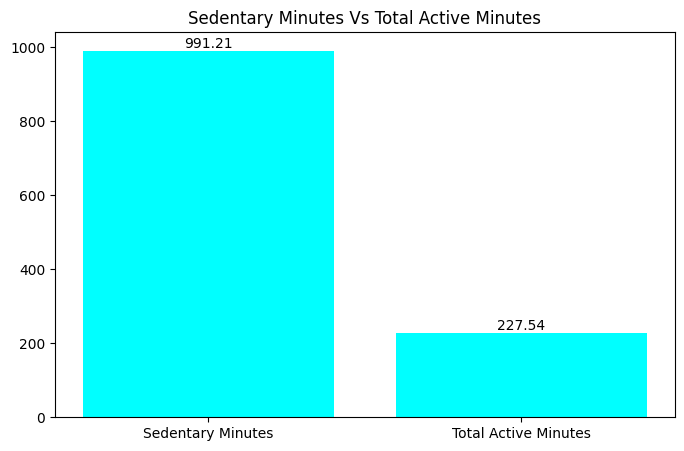

In [53]:
fig, ax = plt.subplots(figsize=(8, 5))

x = np.array(["Sedentary Minutes", "Total Active Minutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["TotalActiveMinutes"].mean()])

# Bar plot
bars = ax.bar(x, y, width=0.8, color="cyan")

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.show()

### KEY FINDINGS:
- There is a huge gap between SedentaryMinutes and TotalActiveMinutes.
- It's obvious that the users spend more time sitting or lying down, than they do being active. This data can also show us something about their lifestyle or occupation. We can assume that most likely they belong to the working class that spends countless hours behind their desk.

### Showing the Total Calories burnt by each day of the week in a bar chart.

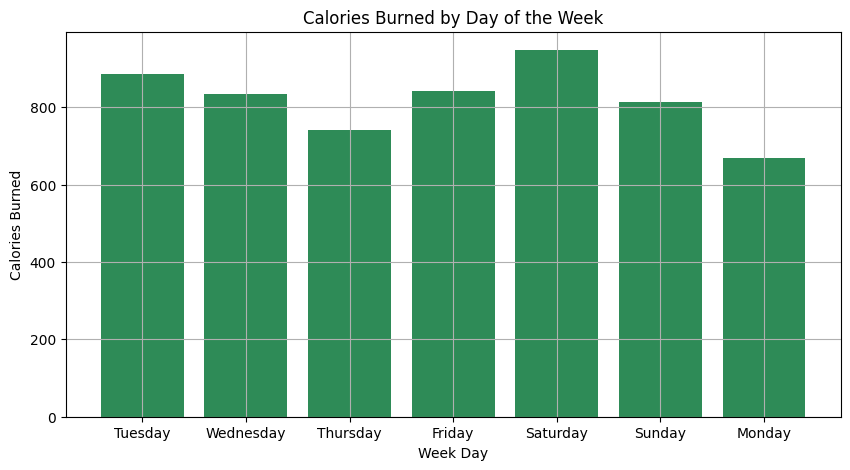

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_df.WeekDay, merge_df.Calories, color = "seagreen")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()

plt.show()

### KEY FINDINGS:
- This plot shows that the most calories were burnt on **Saturday** and that the least calories were burnt on **Monday**.
- **Saturday** is quite understandable being that it is a weekend and the users probably have enough time to exercise. ***Monday***, on the other hand, is quite strange, given that is seen to be one of the busiest days at work for most people.
- The first thing that came to mind is the fact that the users could probably be very busy behind their work desks that they barely have enough time to exercise or take a walk.

### Showing the Total Steps walked every day for the week in a bar chart.

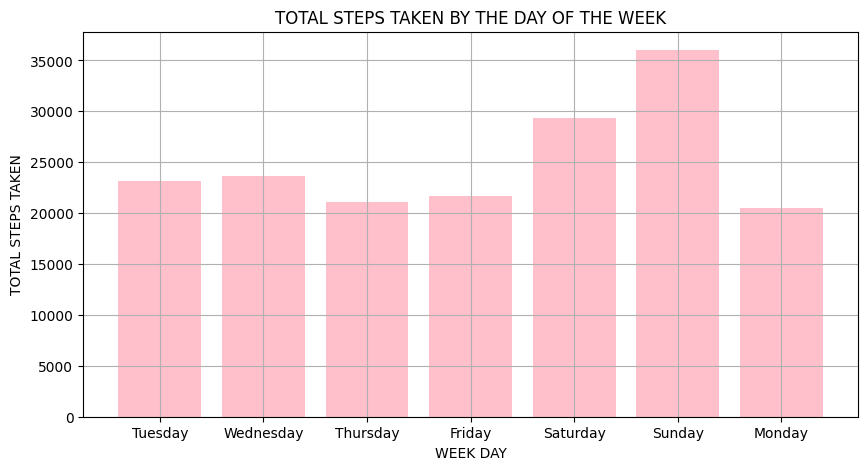

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(daily_activity.WeekDay, daily_activity.TotalSteps,
        color = "pink")
plt.xlabel("WEEK DAY")
plt.ylabel("TOTAL STEPS TAKEN")
plt.title("TOTAL STEPS TAKEN BY THE DAY OF THE WEEK")
plt.grid()
plt.show()

### KEY FINDINGS:
- This gives us the true picture of why Sunday recorded the most calories burnt. Here we see that the least steps were taken by the users on Monday compared to the other days of the week. Meaning they probably spent more hours sitting behind their work desks.
- It also gives us a clue about the profile of the users in the survey. They are most likely working class individuals.
- The most steps were taken on Saturday and Sunday.

### Showing the total minutes spent asleep daily in a week.

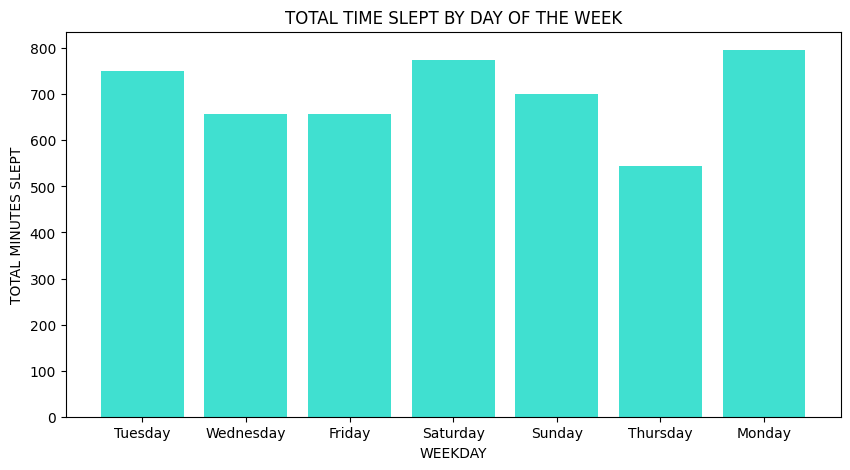

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
x = merge_df2["WeekDay"]
y = merge_df2["TotalMinutesAsleep"]

plt.title("TOTAL TIME SLEPT BY DAY OF THE WEEK")
plt.xlabel("WEEKDAY")
plt.ylabel("TOTAL MINUTES SLEPT")
plt.bar(x, y, width = 0.8, color = "turquoise")
plt.show()

### KEY FINDINGS:
- The least amount of sleep was taken on **Thursday** and the most amount of sleep was taken on **Monday**. Usually people tend to sleep longer when they are more exhausted.
- However, we can also see that the users also slept longer hours on **Saturday**, **Tuesday**, and **Sunday**, which were also the days when they lost the most calories.

### Showing the percentage of activities done in minutes in a pie chart.

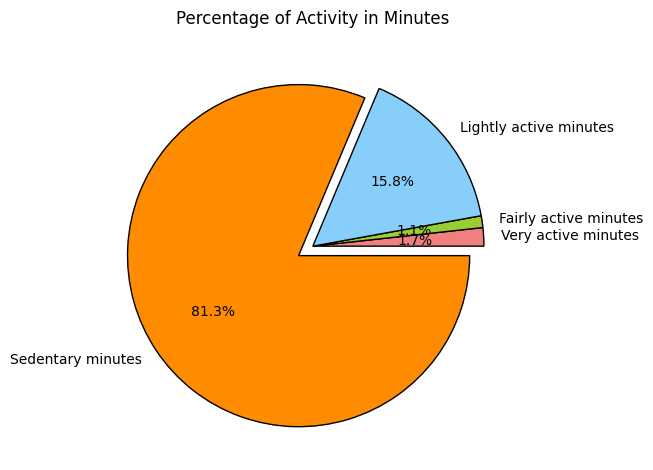

In [57]:
# calculating total of individual minutes column
very_active_mins = daily_activity["VeryActiveMinutes"].sum()
fairly_active_mins = daily_activity["FairlyActiveMinutes"].sum()
lightly_active_mins = daily_activity["LightlyActiveMinutes"].sum()
sedentary_mins = daily_activity["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels,
        colors = colours, wedgeprops = {"edgecolor": "black"},
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

### KEY FINDINGS:
- Sedentary minutes takes the biggest slice at 81.3%.
- This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.
- App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

### Most and Least active hours of the day shown in the bar chart.

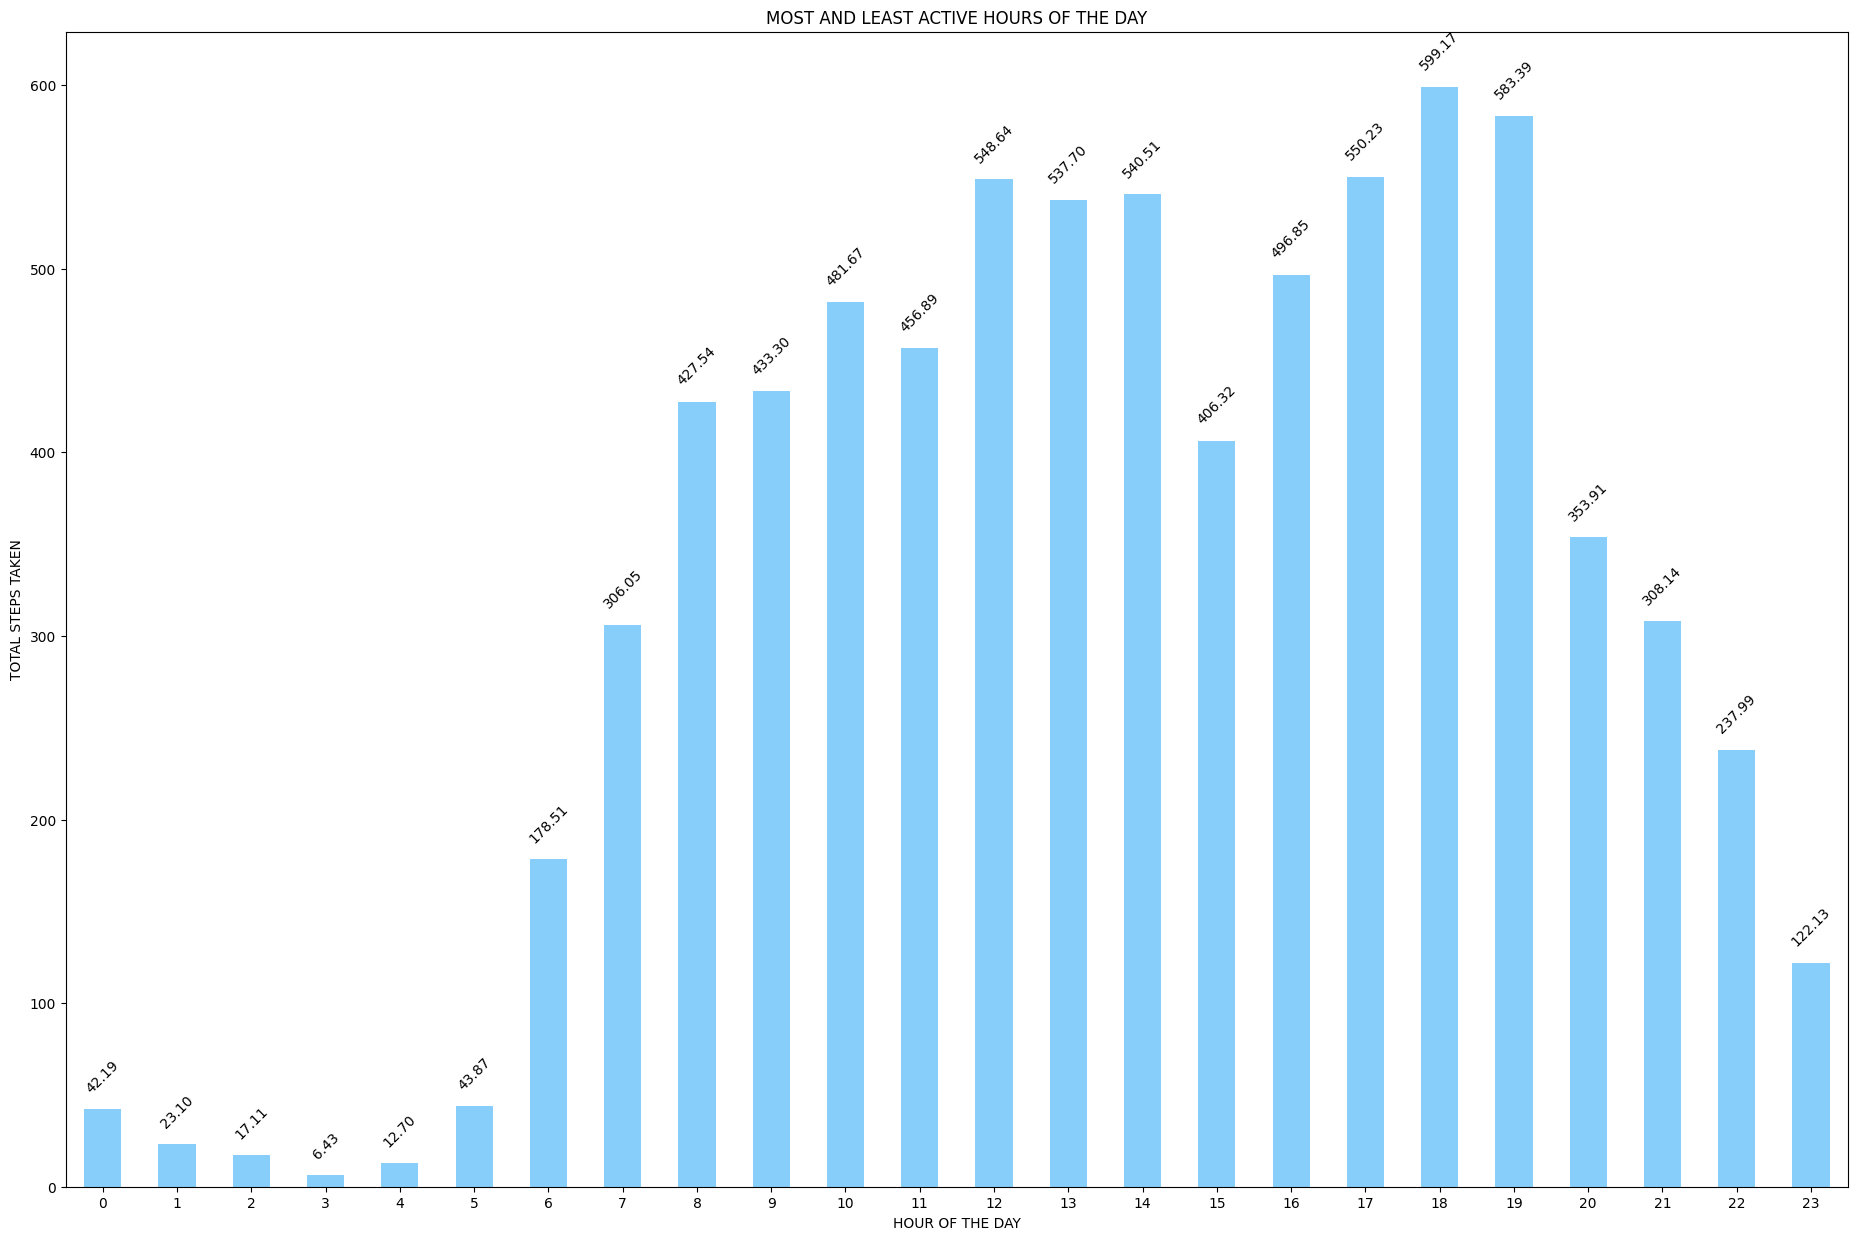

In [58]:
fig, axs = plt.subplots(figsize=(23, 15))

# Group by 'DateHour' and calculate the mean of 'StepTotal'
mean_steps_by_hour = merge_df.groupby('DateHour')['StepTotal'].mean()

# Create a bar plot
mean_steps_by_hour.plot(kind='bar', rot=0, ax=axs, color='lightskyblue', title='MOST AND LEAST ACTIVE HOURS OF THE DAY')

# Adding annotations above each bar
for p in axs.patches:
    height = p.get_height()
    axs.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points',rotation=45)

plt.xlabel("HOUR OF THE DAY")
plt.ylabel("TOTAL STEPS TAKEN")
plt.show()


### FINDINGS:
Here we can see that their day starts getting really busy from 8 a.m. in the morning to all the way to 7 p.m. in the evening. The least active hours of the day are between 8 p.m and 10 p.m. These are probably the best hours to reach them with targetted ads.

## 9. Recommendations
In this final step, we will be delivering our insights and providing recommendations based on our analysis.

Here, we will revisit our business questions and share with you our business recommendations.

1. **Promotion**: The data we explored revealed that consumers are less active between 8p.m. and 10 p.m., shortly before they retire for the night. This is the ideal moment for HealthTrackers Inc. to schedule their advertising initiatives for optimal results. Google AdWords, for example, allows internet advertisers to schedule when their adverts are shown with its ad scheduling function. Such functions can allow HealthTrackers Inc. to effectively reach its consumers. Scheduling adverts will also help Bellabeat save money on advertisements.

2. **Retention**: The objective of any membership program is not limited to generating a regular stream of new members. Retention is crucial! According to an online report, eighty percent of customers quit their subscription to a member site within the first two years of joining the site. For FitBit to retain its consumers, it must focus on personalized contents that offer value. For instance, the data revealed a positive correlation between the number of steps walked and the number of calories burnt. The more steps a person takes each day, the more calories they burn.

3. The data also revealed that one of the issues people have is that they are hardly able to reach the minimum **10,000** steps per day **recommended** for healthy adults. To address this issue, HealthTrackers Inc. can provide fascinating tips to assist its consumers achieve their daily objectives. This may be published periodically on its website. Additionally, it can create engaging challenges to motivate its users to walk regularly. This will not only drive engagement, but also provide enormous value to them.

4. I also noted that people spend far more time being inactive than being active. Inactivity is related with several health problems, including obesity, heart disease, stroke, etc. HealthTrackers Inc. can create explainer videos and blogs to educate its users about the negative impacts of sedentary lifestyle and how to prevent them. This is also a fantastic opportunity for FitBit to provide users with lifestyle-related health data, which links to the FitBit app to offer users with insights on their daily wellbeing.

5. How could these trends help influence FitBit marketing strategy?

    HealthTrackers Inc. marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the FitBit app.

    On weekends, FitBit app can also prompt notification to encourage users to exercise.